In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Loading dataset
data_train = pd.read_csv('C:/Users/Abhay/Documents/GitHub/Deep_Neurals/Neural_Network/Data/train.csv')
data_train.head()
data_test = pd.read_csv('C:/Users/Abhay/Documents/GitHub/Deep_Neurals/Neural_Network/Data/test.csv')
data_test.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_train = data_train.drop('label', axis =1).values
y_train = data_train['label'].values
X_train = X_train.reshape(-1,28,28,1).astype('float32')/255.0
X_Test = data_test.values.reshape(-1,28,28,1).astype('float32')/255.0

In [18]:
data_train['label'].unique()
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train , 10)

In [19]:
from sklearn.model_selection import train_test_split

X_train , X_val , y_train ,y_val =train_test_split(X_train,y_train,test_size=0.2 ,random_state=42)

In [20]:
X_train.shape
X_val.shape
y_train.shape
y_val.shape

(8400, 10)

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D

In [22]:
model = Sequential()

model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\Abhay\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               restore_best_weights=True)

In [25]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=12,
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/12
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7853 - loss: 0.6951 - val_accuracy: 0.9567 - val_loss: 0.1385
Epoch 2/12
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9663 - loss: 0.1111 - val_accuracy: 0.9733 - val_loss: 0.0870
Epoch 3/12
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0711 - val_accuracy: 0.9780 - val_loss: 0.0700
Epoch 4/12
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9814 - loss: 0.0599 - val_accuracy: 0.9824 - val_loss: 0.0591
Epoch 5/12
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0536 - val_accuracy: 0.9844 - val_loss: 0.0525
Epoch 6/12
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0393 - val_accuracy: 0.9733 - val_loss: 0.0856
Epoch 7/12
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0356 - val_accuracy: 0.9814 - val_loss: 0.0580
Epoch 8/12
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9921 - loss: 0.0251 - val_accuracy: 0.

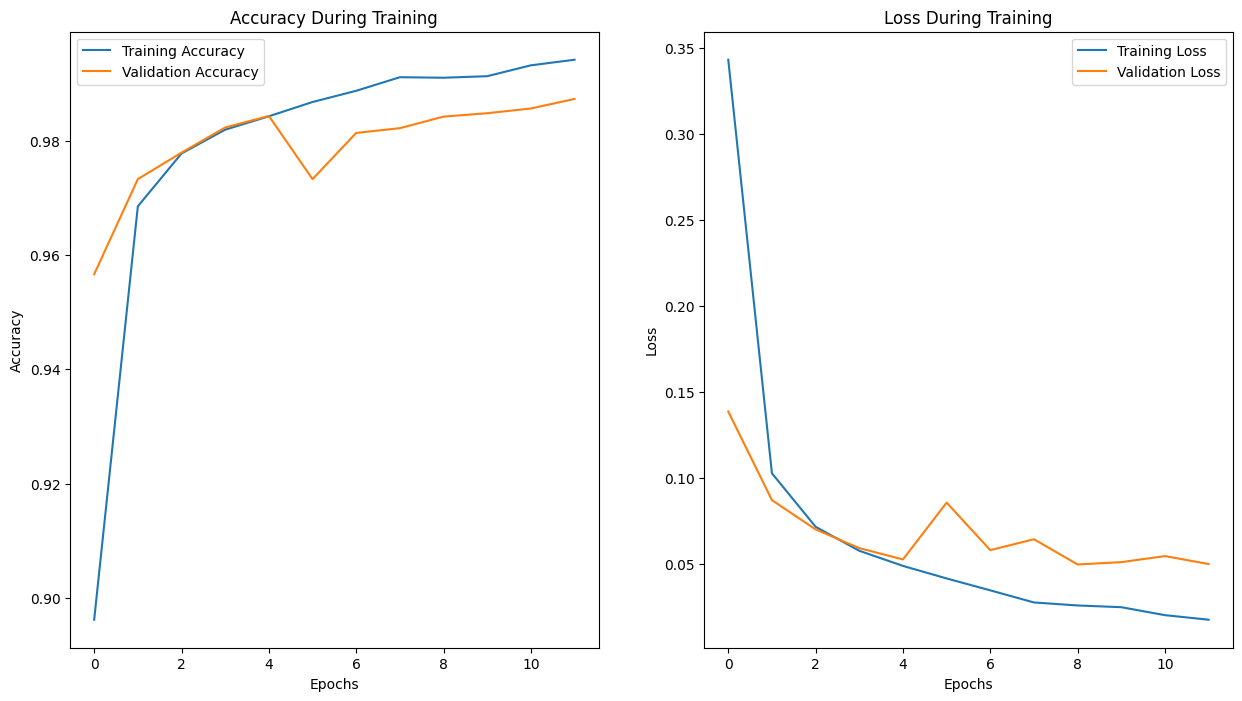

In [26]:
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
y_predictions = model.predict(X_Test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [28]:
predicted_label = np.argmax(y_predictions, axis=1)

In [29]:
predicted_label.shape

(28000,)